# Estructura de bandas e hibridación de orbitales de Diamante (C)

In [1]:
%%capture
!apt install python3-mpi4py cython3 libxc-dev gpaw-data
!pip -q install gpaw pymatgen

Instalamos ASE y GPAW
https://wiki.fysik.dtu.dk/ase/install.html
https://wiki.fysik.dtu.dk/gpaw/install.html


In [2]:
from ase.build import molecule, bulk
from ase import Atoms
from ase.optimize import BFGS
from ase.constraints import StrainFilter
from gpaw import GPAW, PW, FermiDirac
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

In [3]:
cell = bulk('C', 'fcc', a=3.553).get_cell()
a = Atoms('C2', cell=cell, pbc=True,
          scaled_positions=((0, 0, 0), (0.25, 0.25, 0.25)))

calc = GPAW(mode=PW(600),
            xc='LDA',
            occupations=FermiDirac(0),
            kpts={'size': (6, 6, 6), 'gamma': True},
            txt='diamonds-gpaw-lda.txt')

a.calc = calc
E_lda = a.get_potential_energy()
calc.write('diamond_gs.gpw')

In [4]:
calc = GPAW('diamond_gs.gpw').fixed_density(
    nbands=14,
    symmetry='off',
    kpts={'path': 'GXWKGLUWL', 'npoints': 60},
    txt=f'gpaw-Diamond-bands.txt',
    convergence={'bands': 8})

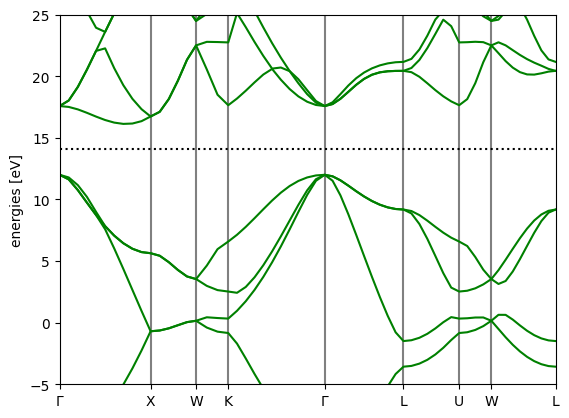

<Axes: ylabel='energies [eV]'>

In [5]:
bs = calc.band_structure()
bs.plot(filename='bandstructure-Diamond.png', show=True, emax=25, emin=-5)

In [6]:
ef = calc.get_fermi_level()

In [7]:
diamond =  GPAW('diamond_gs.gpw').atoms

In [8]:
from ase.dft.kpoints import ibz_points, bandpath

points = ibz_points['fcc']
G = points['Gamma']
X = points['X']
W = points['W']
K = points['K']
L = points['L']
U = points['U']


path = bandpath([G,X,W,K,G,L,U,W,L], diamond.cell, 60)
kpts = path.kpts
(x, XX,labels) = path.get_linear_kpoint_axis()

In [9]:
fkni = calc.get_projections('projectors')
print(np.shape(fkni))
fkni2=(fkni*fkni.conj())

(60, 14, 8)


In [10]:
e_kn = np.array([calc.get_eigenvalues(k) for k in range(60)])
e_kn -= ef

In [11]:
fkni2_Cs=fkni2[:,:,0]+fkni2[:,:,4]
fkni2_Cpx=fkni2[:,:,1]+fkni2[:,:,5]
fkni2_Cpz=fkni2[:,:,2]+fkni2[:,:,6]
fkni2_Cpy=fkni2[:,:,3]+fkni2[:,:,7]